In [ ]:
# !pip install pycaret[full]

In [1]:
# import required libraries 
import pandas as pd 
from pycaret.regression import *
import numpy as np
from osgeo import gdal

In [2]:
# read the training dataset 
df = pd.read_csv('Swanson_subset_30000.csv')
df.head(3)

,label,Bands1,Bands2,Bands3,Bands4,Bands5,Bands6,Bands7,Bands8,Bands9,Bands10,Bands11,Bands12,Bands13
0,1.524,0.0018,0.1929,0.1342,0.1354,0.1165,0.1048,0.1002,0.1214,0.1970,0.2254,0.2746,0.2620,0.0842
1,1.524,0.0018,0.1835,0.1188,0.1369,0.1179,0.1054,0.1157,0.1175,0.1870,0.2164,0.2552,0.2395,0.0919
2,1.524,0.0018,0.1515,0.0871,0.1354,0.1032,0.0897,0.0817,0.0967,0.1642,0.1926,0.2211,0.2032,0.0842


In [3]:
#intialize the setup
reg1 = setup(df, target = 'label',train_size = 0.7, session_id=123, log_experiment=True, experiment_name='Reg1')

,Description,Value
0,session_id,123
1,Target,label
2,Original Data,"(30000, 14)"
3,Missing Values,0
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(20999, 11)"


In [ ]:
# create model 
best_model = compare_models()

In [75]:
# create model rf
rf = create_model('rf')

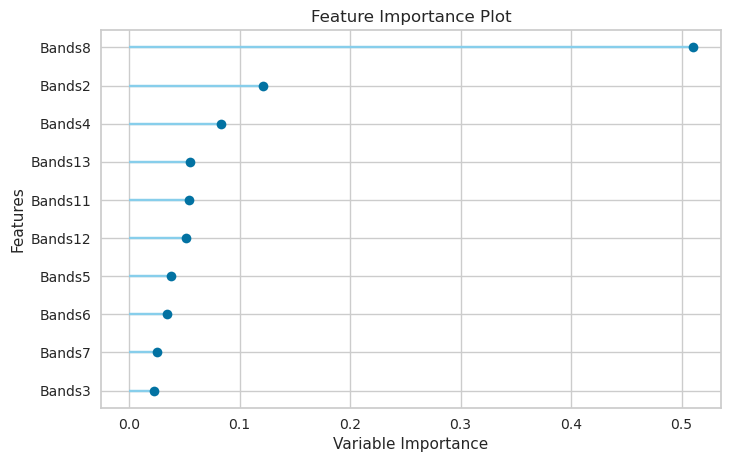

In [ ]:
# feature importance 
plot_model(rf, plot = 'feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


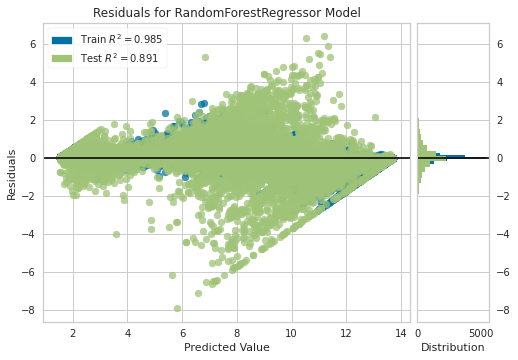

In [6]:
plot_model(rf, plot = 'residuals')

In [7]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.7033,1.2711,1.1275,0.8912,0.1298,0.1046


,Bands1,Bands2,Bands3,Bands4,Bands5,Bands6,Bands7,Bands8,Bands11,Bands12,Bands13,label,Label
0,0.0015,0.1332,0.0734,0.1255,0.1021,0.0891,0.0806,0.1018,0.1687,0.1448,0.0385,2.823866,1.898560
1,0.0013,0.0082,0.0065,0.1239,0.0987,0.0892,0.0576,0.0526,0.0251,0.0273,0.0103,5.887752,8.487830
2,0.0012,0.0082,0.0065,0.1214,0.0986,0.0895,0.0569,0.0544,0.0290,0.0303,0.0108,6.169061,6.881948
3,0.0011,0.0088,0.0058,0.1243,0.0999,0.0906,0.0567,0.0561,0.0275,0.0305,0.0125,7.762879,7.816274
4,0.0013,0.0100,0.0067,0.1221,0.1001,0.0905,0.0571,0.0552,0.0260,0.0288,0.0115,8.862510,9.034281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,0.0011,0.0079,0.0048,0.1233,0.1004,0.0884,0.0568,0.0539,0.0255,0.0263,0.0107,11.079287,11.233684
8997,0.0012,0.0075,0.0056,0.1230,0.0998,0.0877,0.0567,0.0542,0.0265,0.0274,0.0110,12.510407,11.853404
8998,0.0016,0.1544,0.0760,0.1327,0.1038,0.0932,0.0787,0.1025,0.1984,0.1917,0.0638,1.524000,1.712473
8999,0.0012,0.0084,0.0062,0.1243,0.0989,0.0891,0.0562,0.0552,0.0254,0.0259,0.0108,5.983901,6.896183


In [76]:
ig_f = ['Bands1','Bands3','Bands5','Bands6','Bands7','Bands9','Bands10','Bands11','Bands12','Bands13']

In [79]:
#intialize the setup
reg2 = setup(df, target = 'label',train_size = 0.7,ignore_features = ig_f ,session_id=123, log_experiment=True, experiment_name='Reg2')

,Description,Value
0,session_id,123
1,Target,label
2,Original Data,"(30000, 14)"
3,Missing Values,0
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(20999, 3)"


In [81]:
# create model rf
rf1 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.1059,2.9278,1.7111,0.7519,0.1839,0.1522
1,1.0812,2.7847,1.6687,0.7608,0.1800,0.1494
2,1.0519,2.6527,1.6287,0.7629,0.1784,0.1505
3,1.1606,3.2920,1.8144,0.7214,0.1946,0.1605
4,1.1273,3.0185,1.7374,0.7458,0.1872,0.1576
5,1.0744,2.7342,1.6535,0.7645,0.1800,0.1527
6,1.1040,2.9553,1.7191,0.7598,0.1866,0.1574
7,1.0843,2.9014,1.7034,0.7549,0.1847,0.1506
8,1.0876,2.7796,1.6672,0.7537,0.1831,0.1550
9,1.0575,2.7306,1.6524,0.7672,0.1807,0.1520


In [82]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.0935,2.8777,1.6956,0.7543,0.1839,0.1538,1.6660
et,Extra Trees Regressor,0.9825,2.8943,1.7002,0.7529,0.1840,0.1388,1.1080
xgboost,Extreme Gradient Boosting,1.2980,3.2544,1.8034,0.7220,0.1967,0.1825,20.7260
catboost,CatBoost Regressor,1.3647,3.4203,1.8489,0.7079,0.2025,0.1935,2.2080
lightgbm,Light Gradient Boosting Machine,1.3756,3.4496,1.8569,0.7054,0.2039,0.1961,0.1000
gbr,Gradient Boosting Regressor,1.4721,3.7902,1.9465,0.6763,0.2157,0.2131,0.3560
knn,K Neighbors Regressor,1.3616,3.8266,1.9556,0.6732,0.2136,0.1921,0.0230
dt,Decision Tree Regressor,1.1281,4.3469,2.0842,0.6286,0.2260,0.1587,0.0360
ada,AdaBoost Regressor,1.6974,4.4963,2.1202,0.6158,0.2409,0.2548,0.0790
lar,Least Angle Regression,2.2714,6.9724,2.6404,0.4044,0.3363,0.4002,0.0100


In [84]:
# create model rf
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9848,2.8548,1.6896,0.7581,0.1813,0.1356
1,0.9865,2.9302,1.7118,0.7483,0.1844,0.1377
2,0.9300,2.6286,1.6213,0.7651,0.1782,0.1353
3,1.0629,3.3497,1.8302,0.7165,0.1954,0.1463
4,1.0180,3.0382,1.7430,0.7442,0.1879,0.1426
5,0.9750,2.8298,1.6822,0.7563,0.1829,0.1395
6,0.9873,2.9749,1.7248,0.7582,0.1869,0.1415
7,0.9722,2.9679,1.7227,0.7492,0.1855,0.1348
8,0.9831,2.7638,1.6625,0.7551,0.1820,0.1406
9,0.9257,2.6053,1.6141,0.7779,0.1755,0.1343


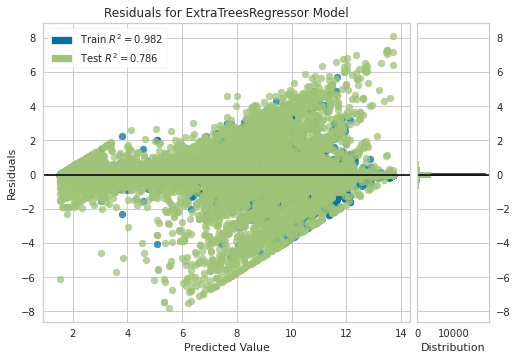

In [85]:
plot_model(et, plot = 'residuals')

In [86]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.8987,2.5033,1.5822,0.7857,0.1722,0.1267


,Bands2,Bands4,Bands8,label,Label
0,0.1332,0.1255,0.1018,2.823866,1.655005
1,0.0082,0.1239,0.0526,5.887752,11.902216
2,0.0082,0.1214,0.0544,6.169061,10.748749
3,0.0088,0.1243,0.0561,7.762879,7.755429
4,0.0100,0.1221,0.0552,8.862510,12.921614
...,...,...,...,...,...
8996,0.0079,0.1233,0.0539,11.079287,9.976443
8997,0.0075,0.1230,0.0542,12.510407,10.931943
8998,0.1544,0.1327,0.1025,1.524000,1.524000
8999,0.0084,0.1243,0.0552,5.983901,9.738808


## Classification

In [87]:
# Define inputs and outputs 
inpRaster = 'enders_reservoir_median_stacked.tif' # put your file path here 
outRaster = 'enders_reservoir_median_stacked_predicted.tif' # put your output file name and path . The name you want to create

In [88]:
#open raster
ds = gdal.Open(inpRaster, gdal.GA_ReadOnly)

#get raster info
rows = ds.RasterYSize
cols = ds.RasterXSize
bands = ds.RasterCount
geo_transform = ds.GetGeoTransform()
projection = ds.GetProjectionRef()

#read as array
array = ds.ReadAsArray()
ds = None

#modify structure
array = np.stack(array,axis=2)
array = np.reshape(array, [rows*cols,bands])
test = pd.DataFrame(array, dtype='float64') ######this should be modified to float 32 I think as we have decimal values#####
del array

In [89]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002033,0.338500,0.232980,0.144604,0.131900,0.125980,0.144393,0.161275,0.192357,0.214175,0.241973,0.215760,0.086725
1,0.002000,0.334886,0.227517,0.143000,0.131792,0.123790,0.141750,0.156914,0.186680,0.210450,0.237333,0.211867,0.085675
2,0.002000,0.334886,0.227517,0.143000,0.129977,0.121913,0.139511,0.156914,0.186680,0.210450,0.237333,0.207400,0.085675
3,0.002000,0.330725,0.223786,0.143000,0.129873,0.121936,0.139357,0.155256,0.184840,0.206200,0.235233,0.207200,0.085675
4,0.002000,0.328800,0.221533,0.143000,0.129678,0.120485,0.139508,0.155192,0.182571,0.206614,0.231171,0.205933,0.085675


In [90]:
df_test = test.rename(columns = {0:'Bands1',
1:'Bands2',
2:'Bands3',
3:'Bands4',
4:'Bands5',
5:'Bands6',
6:'Bands7',
7:'Bands8',
8:'Bands9',
9:'Bands10',
10:'Bands11',
11:'Bands12',
12:'Bands13'})

df_test.head()

,Bands1,Bands2,Bands3,Bands4,Bands5,Bands6,Bands7,Bands8,Bands9,Bands10,Bands11,Bands12,Bands13
0,0.002033,0.338500,0.232980,0.144604,0.131900,0.125980,0.144393,0.161275,0.192357,0.214175,0.241973,0.215760,0.086725
1,0.002000,0.334886,0.227517,0.143000,0.131792,0.123790,0.141750,0.156914,0.186680,0.210450,0.237333,0.211867,0.085675
2,0.002000,0.334886,0.227517,0.143000,0.129977,0.121913,0.139511,0.156914,0.186680,0.210450,0.237333,0.207400,0.085675
3,0.002000,0.330725,0.223786,0.143000,0.129873,0.121936,0.139357,0.155256,0.184840,0.206200,0.235233,0.207200,0.085675
4,0.002000,0.328800,0.221533,0.143000,0.129678,0.120485,0.139508,0.155192,0.182571,0.206614,0.231171,0.205933,0.085675


In [91]:
%%time
# make prediction on the df_test dataset using the trained model from above 
df_p = predict_model(et, df_test)
df_p.head()

CPU times: user 1.82 s, sys: 27.7 ms, total: 1.85 s
Wall time: 754 ms


,Bands1,Bands2,Bands3,Bands4,Bands5,Bands6,Bands7,Bands8,Bands9,Bands10,Bands11,Bands12,Bands13,Label
0,0.002033,0.338500,0.232980,0.144604,0.131900,0.125980,0.144393,0.161275,0.192357,0.214175,0.241973,0.215760,0.086725,1.765077
1,0.002000,0.334886,0.227517,0.143000,0.131792,0.123790,0.141750,0.156914,0.186680,0.210450,0.237333,0.211867,0.085675,1.709001
2,0.002000,0.334886,0.227517,0.143000,0.129977,0.121913,0.139511,0.156914,0.186680,0.210450,0.237333,0.207400,0.085675,1.709001
3,0.002000,0.330725,0.223786,0.143000,0.129873,0.121936,0.139357,0.155256,0.184840,0.206200,0.235233,0.207200,0.085675,1.617980
4,0.002000,0.328800,0.221533,0.143000,0.129678,0.120485,0.139508,0.155192,0.182571,0.206614,0.231171,0.205933,0.085675,1.617980


In [92]:
# I just need the predicted labels encoded as integer 
y_pred1 = df_p.Label
y_pred1

0         1.765077
1         1.709001
2         1.709001
3         1.617980
4         1.617980
            ...   
252904    1.600200
252905    1.661160
252906    1.661160
252907    1.661160
252908    1.577433
Name: Label, Length: 252909, dtype: float64

In [93]:
# conver the data into numpy 
y_pred= y_pred1.to_numpy()
y_pred

array([1.76507692, 1.70900054, 1.70900054, ..., 1.66116005, 1.66116005,
       1.57743274])

In [94]:
%%time 
classification = y_pred.reshape((rows,cols))
del y_pred

def createGeotiff(outRaster, data, geo_transform, projection):
    # Create a GeoTIFF file with the given data
    driver = gdal.GetDriverByName('GTiff')
    rows, cols = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, 1, gdal.GDT_Float64)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    band = rasterDS.GetRasterBand(1)
    band.WriteArray(data)
    rasterDS = None

CPU times: user 0 ns, sys: 23 µs, total: 23 µs
Wall time: 27.4 µs


In [96]:
#export classified image
createGeotiff(outRaster,classification,geo_transform,projection)

## MAE Analysis

In [52]:
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [53]:
df1 = pd.read_csv('LagoPatillas_test.csv')
df1.head()

,Original,Predicted1
0,0.000000,2.390563
1,0.000000,2.390563
2,0.000000,2.390563
3,0.001019,2.390563
4,0.000000,2.390563


In [55]:
MAE = mean_absolute_error(df1['Original'],df1['Predicted1'])
print(MAE)

8.087574375678155


In [57]:
df2 = pd.read_csv('Swanson_subset_30000_predicted.csv')
df2.head()

,Original,Predicted1
0,1.524,1.553162
1,1.524,1.566736
2,1.524,1.536832
3,1.524,1.536832
4,1.524,1.524860


In [58]:
MAE1 = mean_absolute_error(df2['Original'],df2['Predicted1'])
print(MAE1)

0.6826136439148295


In [72]:
df3 = pd.read_csv('enders_reservoir_predicted.csv')
df3.head()

,id,Original1,Predicted1
0,0,14.935200,8.176358
1,1,17.151846,9.078774
2,2,12.192000,9.338679
3,4,9.144000,1.873546
4,7,7.620000,1.890243


In [74]:
MAE2 = mean_absolute_error(df3['Original1'],df3['Predicted1'])
print(MAE2)

5.419430700927796


In [97]:
df4 = pd.read_csv('enders_reservoir_predicted_et.csv')
df4.head()

,id,Original1,Predicted1
0,451,15.144737,7.052192
1,4560,10.836308,9.612353
2,2502,11.164556,8.842207
3,4565,16.878939,7.144895
4,4564,16.599100,9.262980


In [98]:
MAE3 = mean_absolute_error(df4['Original1'],df4['Predicted1'])
print(MAE3)

6.2754373222944535
